# Classifying Text using Multinomial Naive Bayes

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = fetch_20newsgroups()

In [3]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [5]:
print(train.data[0])

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

In [6]:
print(train.data[1])

From: MANDTBACKA@finabo.abo.fi (Mats Andtbacka)
Subject: Re: If There Were No Hell
Organization: Unorganized Usenet Postings UnInc.
Lines: 26

In <May.5.02.51.25.1993.28737@athos.rutgers.edu> shellgate!llo@uu4.psi.com writes:

> Here's a question that some friends and I were debating last night.
> Q: If you knew beyond all doubt that hell did not exist and that
>    unbelievers simply remained dead, would you remain a Christian?

      (Reasoning pertinent to believing Xians deleted for space)

      It strikes me, for no apparent reason, that this is reversible.
I.e., if I had proof that there existed a hell, in which I would be
eternally punished for not believing in life, would that make me a Xian?
(pardon my language) _Bloody_hell_no_!

      ...Of course, being merely a reversal of your thinking, this
doesn't add anything _new_ to the debate, but...

> Several friends disagreed, arguing the fear of hell was necessary
> to motivate people to Christianity. To me that fatally undercu

In [7]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [8]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [9]:
print(labels)

[2 0 1 ... 1 2 1]


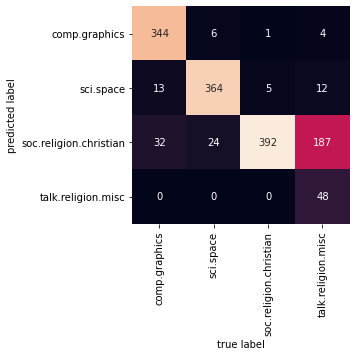

In [10]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');

In [11]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [12]:
predict_category('sending a payload to the ISS')

'sci.space'

In [13]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [14]:
predict_category('determining the screen resolution')

'comp.graphics'